In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [8]:
# URL del dataset CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQFCJnfEJg7Mc0-x8oGDaQxAWQDEtMpSoMYNc8ysXf7cL8YGcVtFVvdXGMZJIVzeQ/pub?output=csv"

In [22]:

response = requests.get(csv_url)
response.raise_for_status()


In [10]:
# Caricare i dati in un DataFrame
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data, delimiter=",", encoding="utf-8")


In [11]:
# Stampare i nomi reali delle colonne per debugging
print("Colonne originali nel dataset:", df.columns.tolist())

Colonne originali nel dataset: ['Descrizione_sintetica', 'Q_tà', '%']


In [12]:
# Correggere la possibile codifica errata nei nomi delle colonne
col_mapping = {df.columns[0]: "Luogo", df.columns[1]: "Numero_infrazioni", df.columns[2]: "Percentuale"}
df.rename(columns=col_mapping, inplace=True)


In [13]:
# Stampare i nuovi nomi delle colonne per conferma
print("Colonne dopo rinomina:", df.columns.tolist())

Colonne dopo rinomina: ['Luogo', 'Numero_infrazioni', 'Percentuale']


In [14]:
# Convertire i dati numerici gestendo il separatore decimale
df["Numero_infrazioni"] = pd.to_numeric(df["Numero_infrazioni"], errors="coerce")
df["Percentuale"] = df["Percentuale"].astype(str).str.replace(",", ".").astype(float)

In [15]:
# Mostrare le prime righe del dataset
print(df.head())

                    Luogo  Numero_infrazioni  Percentuale
0              VIA FOGGIA                142        10.50
1      STRADA STATALE 172                129         9.54
2            C.SO UMBERTO                108         7.99
3      VIA MARTINA FRANCA                 83         6.14
4  C.SO VITTORIO EMANUELE                 82         6.07


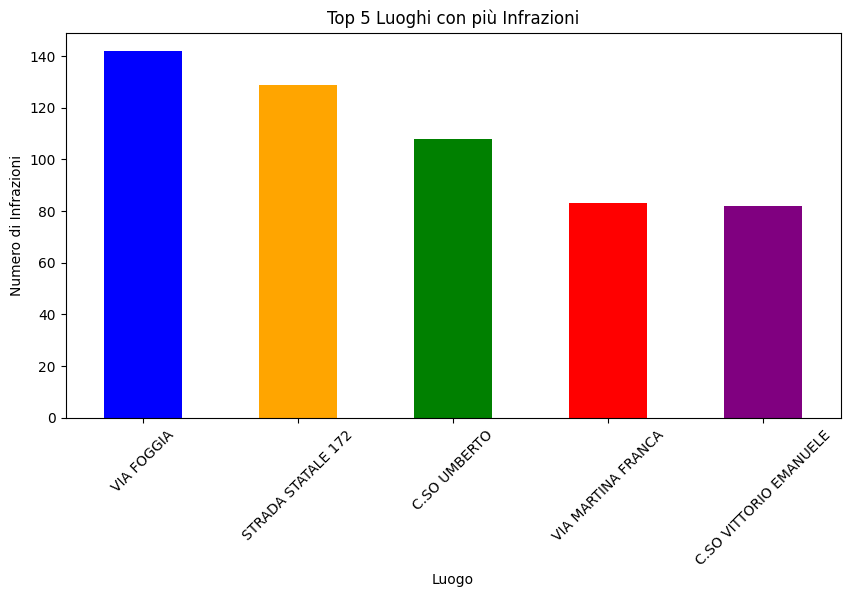

In [18]:
# Creazione del terzo grafico: Confronto tra le prime 5 vie con più infrazioni
top_5 = df.groupby("Luogo")["Numero_infrazioni"].sum().nlargest(5)
plt.figure(figsize=(10, 5))
top_5.plot(kind="bar", color=["blue", "orange", "green", "red", "purple"])
plt.title("Top 5 Luoghi con più Infrazioni")
plt.xlabel("Luogo")
plt.ylabel("Numero di Infrazioni")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

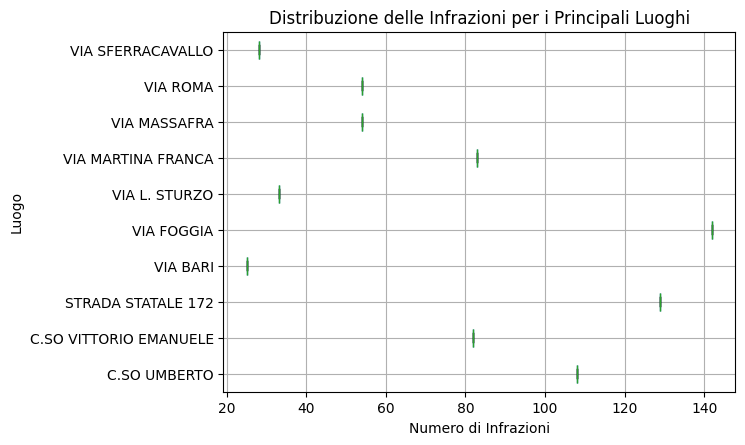

In [19]:

# Creazione del terzo grafico: Boxplot delle infrazioni per i principali luoghi
df_top = df[df["Luogo"].isin(df.groupby("Luogo")["Numero_infrazioni"].sum().nlargest(10).index)]
plt.figure(figsize=(12, 6))
df_top.boxplot(column="Numero_infrazioni", by="Luogo", vert=False, patch_artist=True)
plt.title("Distribuzione delle Infrazioni per i Principali Luoghi")
plt.xlabel("Numero di Infrazioni")
plt.ylabel("Luogo")
plt.suptitle("")
plt.show()

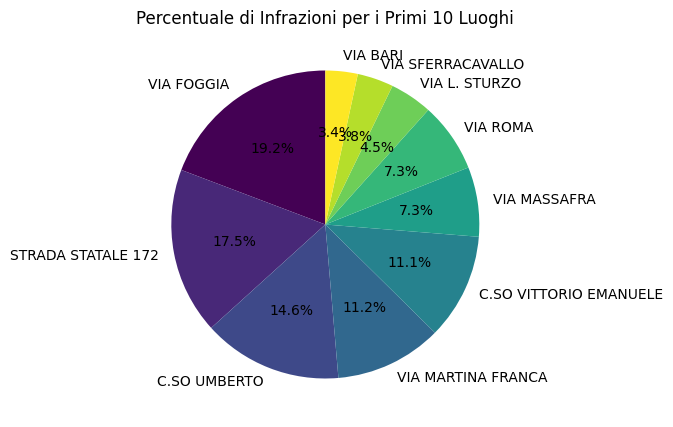

In [20]:
# Creazione del secondo grafico: Percentuale di infrazioni per i primi 10 luoghi
df_top_percent = df.groupby("Luogo")["Percentuale"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
df_top_percent.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap='viridis')
plt.title("Percentuale di Infrazioni per i Primi 10 Luoghi")
plt.ylabel("")
plt.show()